# Unsupervised Whistle Repertoire Classification

In [2]:
!pip install dtaidistance
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw, similarity
from scipy import signal

# Exploring the Dtaidistance Library

Here we first explore the dynamic time warping functionality of the dtaidistance library and do some timing tests with toy data. This coding section is the "rough work" before a proper classification function is written.

In [4]:
%%time
from dtaidistance import dtw, similarity
s = np.array([[0., 0, 1, 2, 1, 0, 1, 0, 0],
              [0., 1, 2, 0, 0, 0, 0, 0, 0],
              [1., 2, 0, 0, 0, 0, 0, 1, 1],
              [0., 0, 1, 2, 1, 0, 1, 0, 0],
              [0., 1, 2, 0, 0, 0, 0, 0, 0],
              [1., 2, 0, 0, 0, 0, 0, 1, 1],
              [0., 1., 0, 9, 9, 0, 1, 1, 1]])
s = np.random.rand(1000,400)
print(s.shape)
sim = similarity.distance_to_similarity(dtw.distance_matrix_fast(s))
dist = np.ones(np.shape(sim)) - sim
#print(np.shape(dist))
#print(dist)
a=np.where(dist<=0.2)
b=np.where(dist>0.2)

dist[a] = a[1]
dist[b] = -1 # set to negative number if not part of category
#print(dist)
#c = [set(i) for i in dist]
#c
c = np.unique(dist, axis=0)
d = [arr[arr!=-1] for arr in c]
#d
# print
len([s[arr.astype(int)] for arr in d])

(1000, 400)
CPU times: user 9min 12s, sys: 2.06 s, total: 9min 14s
Wall time: 7min 8s


1000

# Formalising the Code
Here, a formal function is written which returns numpy arrays of whistles in their different categories.

In [3]:
def get_categories(contours, dist_threshold=0.3):

  # create similarity matrix
  similarity_matrix = similarity.distance_to_similarity(dtw.distance_matrix_fast(contours))

  # create distance matrix, ensuring that distance = 1 - similarity
  # Note that the default distance calculation is not normalised
  dist_matrix = np.ones(np.shape(similarity_matrix)) - similarity_matrix

  # assign indices corresponding to contours which match in terms of distance
  similar_indices=np.where(dist_matrix<=dist_threshold)
  dissimilar_indices=np.where(dist_matrix>dist_threshold)

  dist_matrix[similar_indices] = similar_indices[1] # set matching whistle positions equal to column indices
                                                    # of contours

  # non-similar contours in each row the value of -1
  # Note that this is a sage identifier for removal of dissimilar pairs
  # because the distance metric is non-negative.
  dist_matrix[dissimilar_indices] = -1

  # keep unique categories of contours
  unique_categories = np.unique(dist_matrix, axis=0)
  unique_categories = [arr[arr!=-1] for arr in unique_categories] # remove non-matches marked by -1

  # return categorised list of whistles
  return [contours[arr.astype(int)] for arr in unique_categories]


# Testing Code on Reasonably Challenging Synthetic Data

Here the code is tested on a slightly more realistic example, using 2100 different whistle contours. Comparing this to the above timing result seems to suggest that the distance calculation between whistle contours is quadratic in time.

In [4]:
%%time

a = np.sin(0.1*np.arange(0, 400))
b = np.cos(0.1*np.arange(0, 400))
c = 0.01*np.tan(0.1*np.arange(0, 400))
d = np.sin(0.15*np.arange(0, 400))
e = np.cos(0.15*np.arange(0, 400))
f = 0.01*np.tan(0.15*np.arange(0, 400))
g = signal.square(0.1*np.arange(0, 400))

contours = np.array([a,b,c,d,e,f,g]*300)
categories = get_categories(contours)
print(len(categories))

4
CPU times: user 40min 40s, sys: 7.89 s, total: 40min 47s
Wall time: 31min 30s


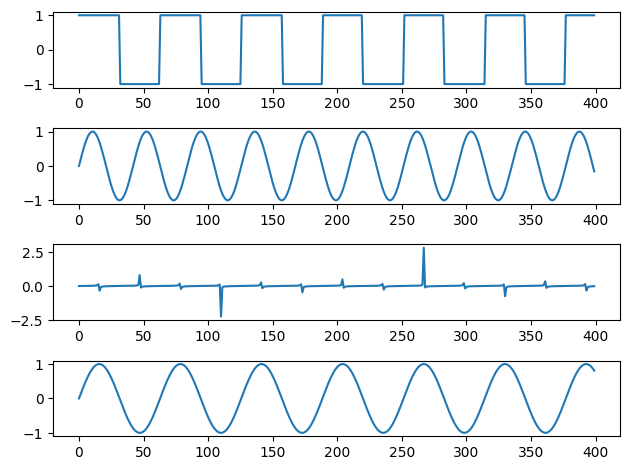

In [5]:
fig, axes = plt.subplots(len(categories), 1)
for i, ax in enumerate(axes):
  ax.plot(categories[i][0])
fig.tight_layout()
#plt.plot(categories[1][0])